In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons , make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def make_spirals(n_samples=500, noise=0.1, random_state=42):
    """ Generuje dane w ksztalcie spiral ."""
    np.random.seed(random_state)
    n = n_samples // 2
    theta = np.linspace(0, 4 * np.pi, n)
    r = theta / (4 * np.pi)
    x1 = r * np.cos(theta) + noise * np.random.randn(n)
    y1 = r * np.sin(theta) + noise * np.random.randn(n)
    x2 = -r * np.cos(theta) + noise * np.random.randn(n)
    y2 = -r * np.sin(theta) + noise * np.random.randn(n)
    X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    y = np.array([0] * n + [1] * n)
    return X, y


def plot_decision_boundary(model, X, y, ax, title =""):
    """ Rysuje granice decyzyjna modelu ."""
    h = 0.02 
    x_min, x_max = X [:, 0].min() - 0.5, X [:, 0].max() + 0.5
    y_min, y_max = X [:, 1].min() - 0.5, X [:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.scatter(X[: , 0], X[: , 1], c=y, cmap='RdYlBu', edgecolors='black', alpha=0.5)
    ax.set_title(title)

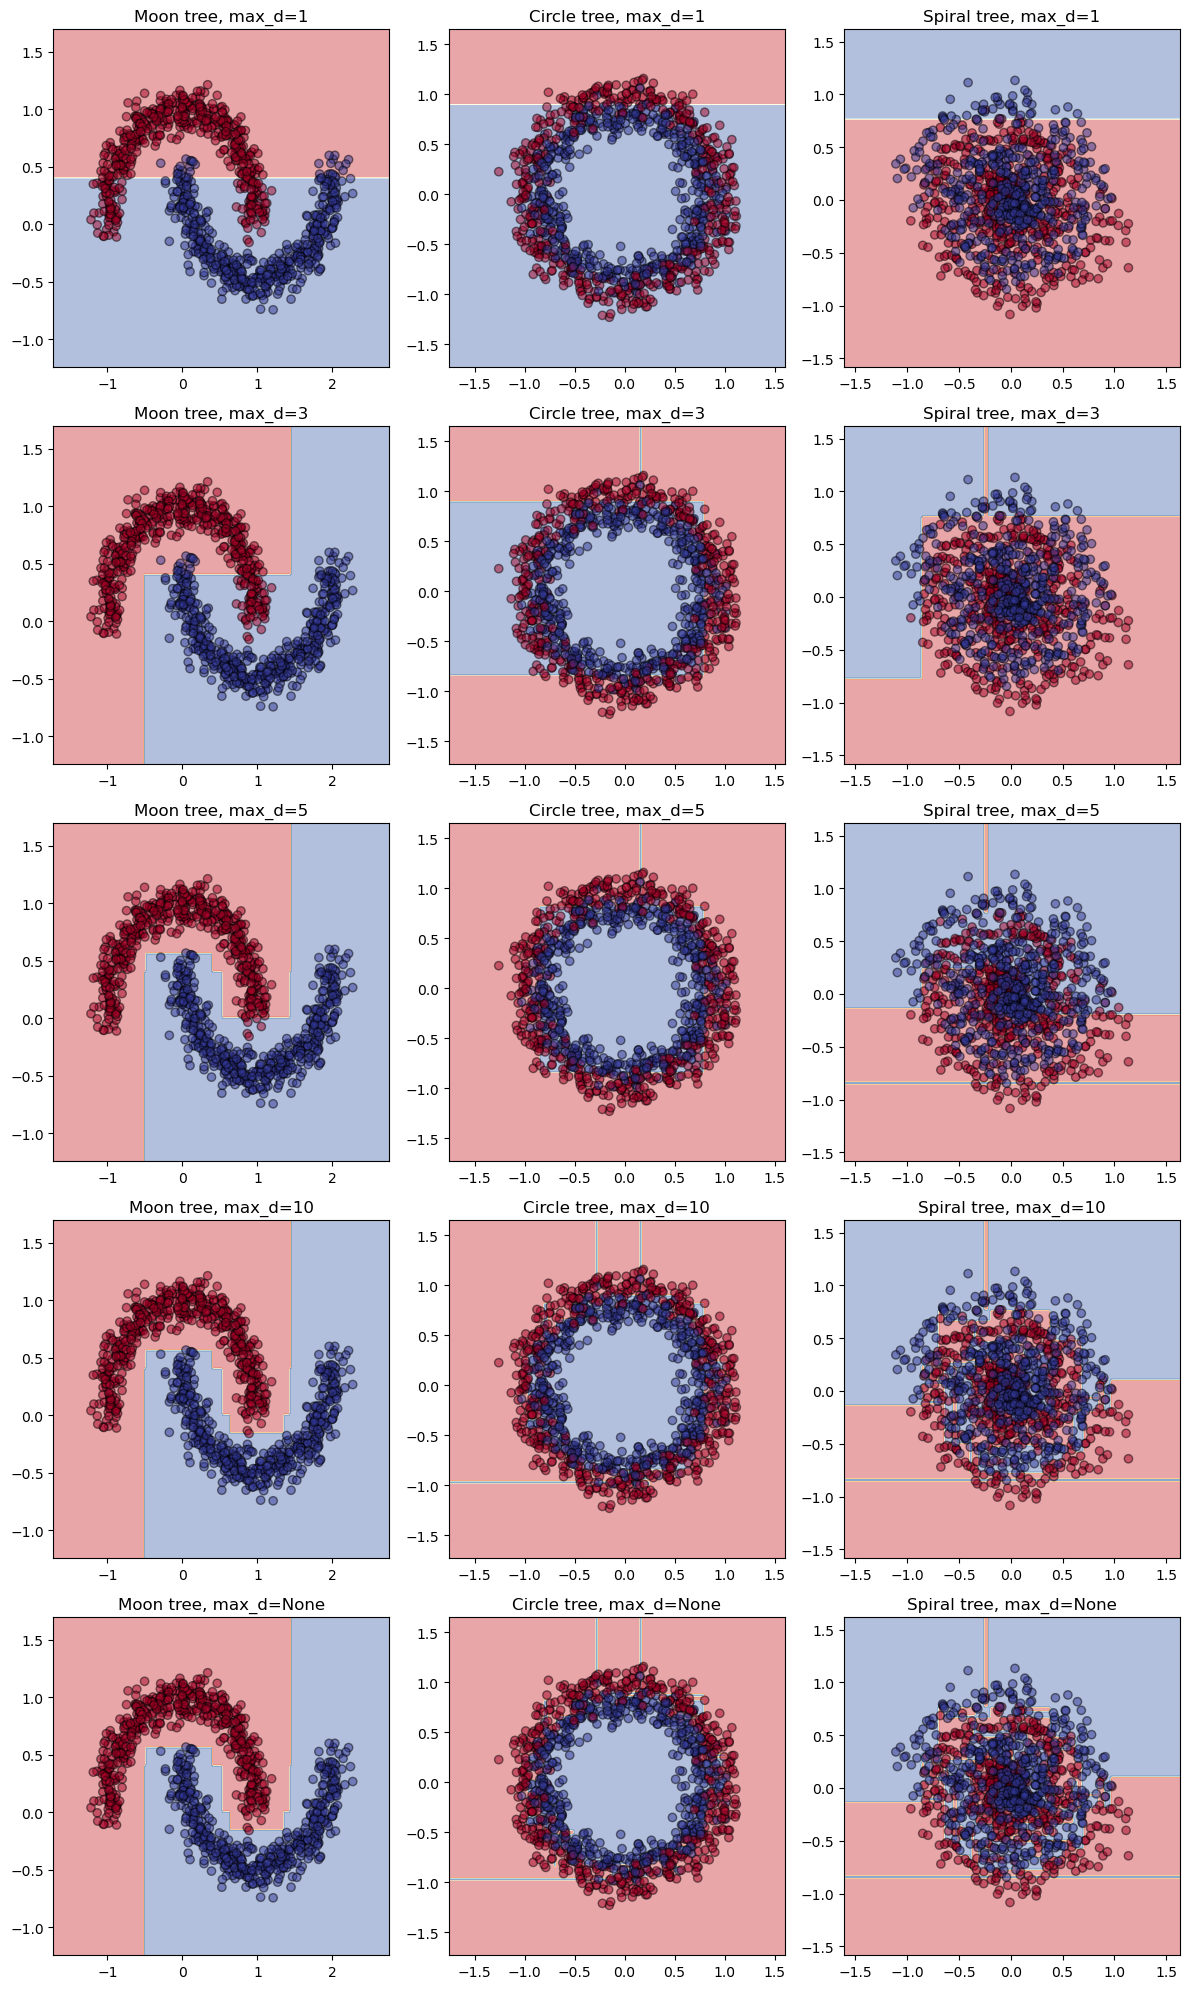

In [8]:
# Podpunkt a

X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, random_state=42)
X_spirals, y_spirals = make_spirals(n_samples=1000, noise=0.1, random_state=42)

moon_trees = []
circle_trees = []
spiral_trees = []
depth = [1, 3, 5, 10, None]

fig, axes = plt.subplots(5, 3, figsize=(12, 20), tight_layout=True)
axes = axes.flatten()

for i, d in enumerate(depth):
    moon_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    moon_tree.fit(X_moons, y_moons)
    moon_trees.append(moon_tree)
    plot_decision_boundary(moon_tree, X_moons, y_moons, axes[0 + i * 3], f"Moon tree, max_d={d}")

    circle_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    circle_tree.fit(X_circles, y_circles)
    circle_trees.append(circle_tree)
    plot_decision_boundary(circle_tree, X_circles, y_circles, axes[1 + i * 3], f"Circle tree, max_d={d}")

    spiral_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    spiral_tree.fit(X_spirals, y_spirals)
    spiral_trees.append(spiral_tree)
    plot_decision_boundary(spiral_tree, X_spirals, y_spirals, axes[2 + i * 3], f"Spiral tree, max_d={d}")



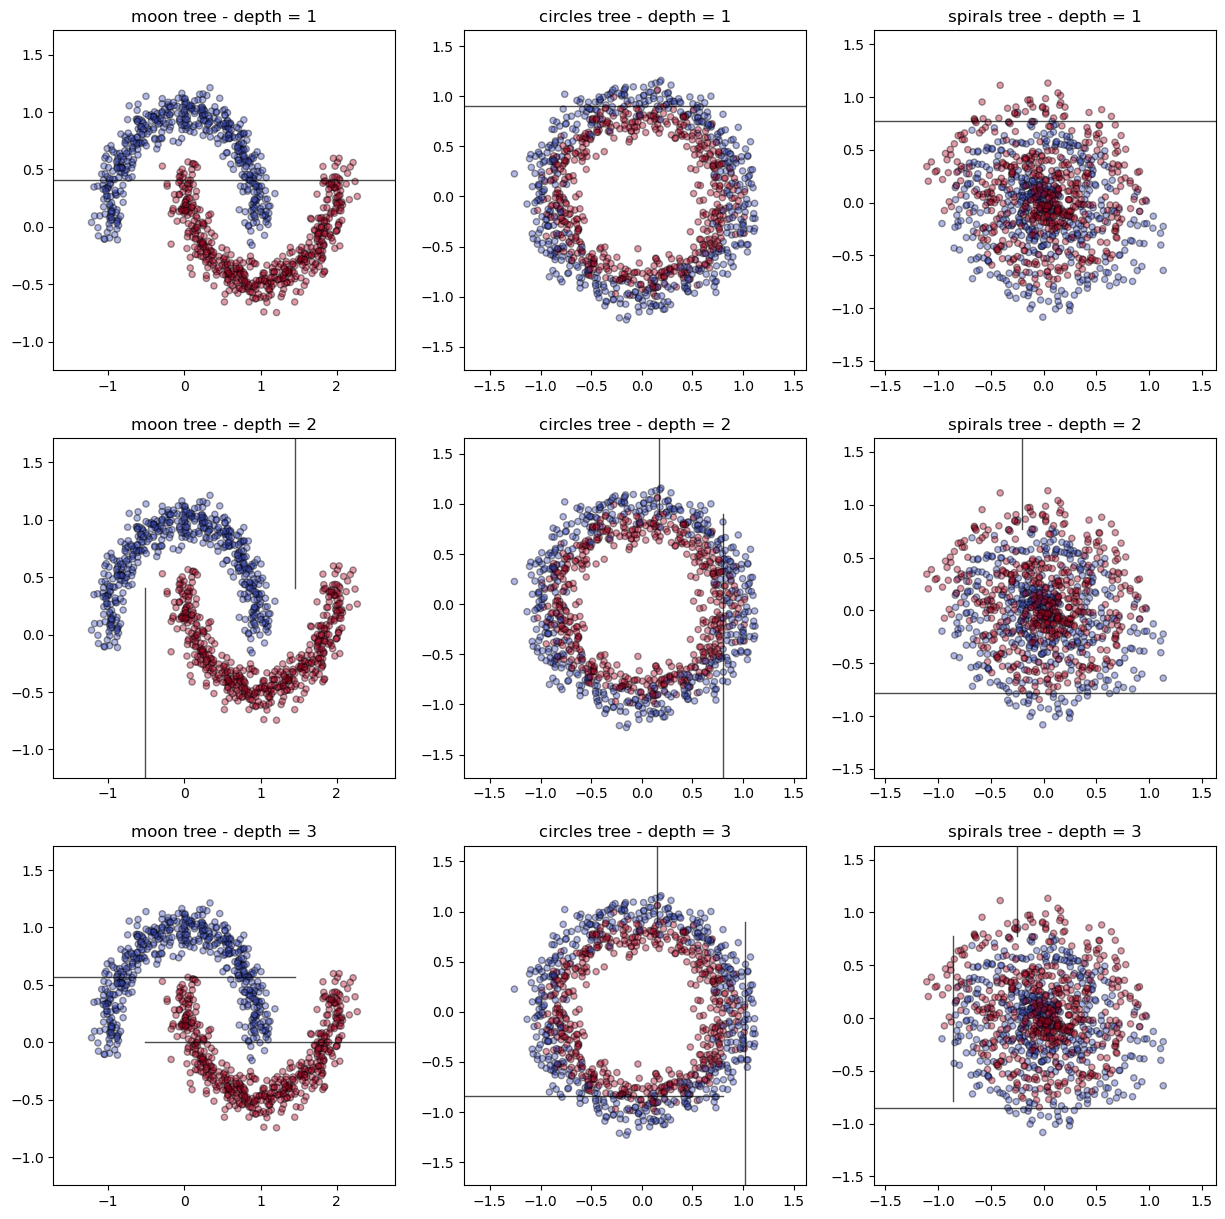

In [11]:
def visualize_tree_splits(tree_model, node, bounds, ax, ax_id):
    """ Wizualizuje kolejne podzialy drzewa ."""
    # TODO : Rekurencyjnie narysuj linie podzialow
    # Uzyj tree.tree_.feature, tree.tree_.threshold
    left = tree_model.children_left[node]
    right = tree_model.children_right[node]
    if left == -1: # brak dzieci = jesteśmy w liściu
        return
    feature = tree_model.feature[node]
    threshold = tree_model.threshold[node]
    x_min, x_max, y_min, y_max = bounds

    if feature == 0: # podział wzdłuż osi X
        ax[ax_id].plot([threshold, threshold], [y_min, y_max], color='k', linewidth=1, alpha=0.7)
        visualize_tree_splits(tree_model, left, (x_min, threshold, y_min, y_max), ax, ax_id+3)
        visualize_tree_splits(tree_model, right, (threshold, x_max, y_min, y_max), ax, ax_id+3)
    else:
        ax[ax_id].plot([x_min, x_max], [threshold, threshold], color='k', linewidth=1, alpha=0.7)
        visualize_tree_splits(tree_model, left, (x_min, x_max, y_min, threshold), ax, ax_id+3)
        visualize_tree_splits(tree_model, right, (x_min, x_max, threshold, y_max), ax, ax_id+3)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

def plot_trees(name, X, y, ax_id):
    tree = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree.fit(X, y)
    axes[0 + ax_id].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k', alpha=0.4)
    axes[3 + ax_id].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k', alpha=0.4)
    axes[6 + ax_id].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k', alpha=0.4)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    axes[0 + ax_id].set_xlim(x_min, x_max)
    axes[0 + ax_id].set_ylim(y_min, y_max)
    axes[0 + ax_id].set_title(f"{name} tree - depth = 1")
    axes[3 + ax_id].set_xlim(x_min, x_max)
    axes[3 + ax_id].set_ylim(y_min, y_max)
    axes[3 + ax_id].set_title(f"{name} tree - depth = 2")
    axes[6 + ax_id].set_xlim(x_min, x_max)
    axes[6 + ax_id].set_ylim(y_min, y_max)
    axes[6 + ax_id].set_title(f"{name} tree - depth = 3")
    visualize_tree_splits(tree.tree_, 0, (x_min, x_max, y_min, y_max), axes, ax_id)


plot_trees("moon", X_moons, y_moons, 0)
plot_trees("circles", X_circles, y_circles, 1)
plot_trees("spirals", X_spirals, y_spirals, 2)

plt.show()



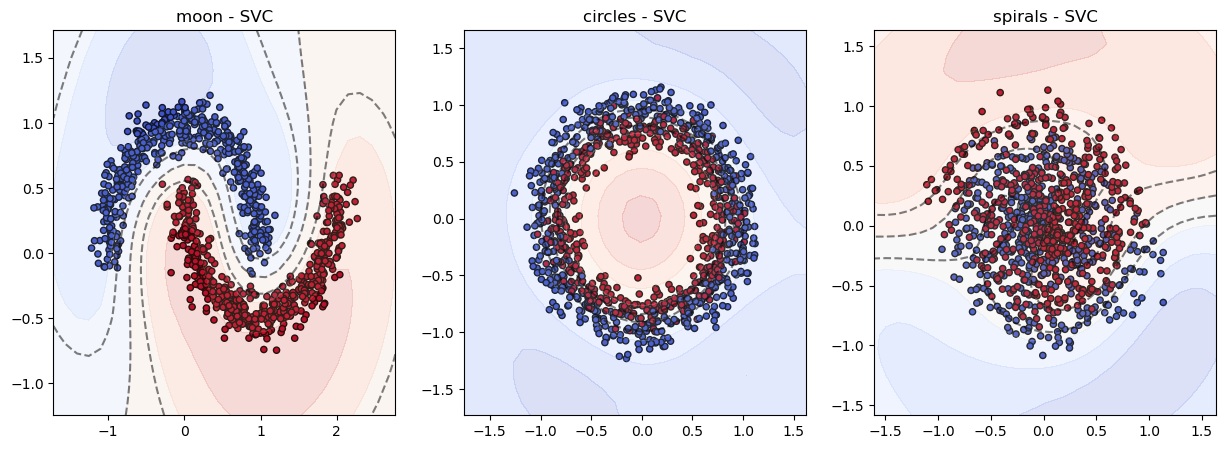

In [20]:
def plot_svc(name, X, y, ax, ax_id):
    svc = SVC(kernel='rbf', C=10, gamma=1.0)
    svc.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    ax[ax_id].set_xlim(x_min, x_max)
    ax[ax_id].set_ylim(y_min, y_max)

    xx = np.linspace(x_min, x_max, 30)
    yy = np.linspace(y_min, y_max, 30)
    Y, X_grid = np.meshgrid(yy, xx)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T

    ax[ax_id].scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm', edgecolors='k')

    P = svc.decision_function(xy).reshape(X_grid.shape)
    ax[ax_id].contour(X_grid, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '--', '--'])
    ax[ax_id].contourf(X_grid, Y, P, cmap='coolwarm', alpha=0.2)
    ax[ax_id].set_title(f"{name} - SVC")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_svc("moon", X_moons, y_moons, axes, 0)
plot_svc("circles", X_circles, y_circles, axes, 1)
plot_svc("spirals", X_spirals, y_spirals, axes, 2)

plt.show()

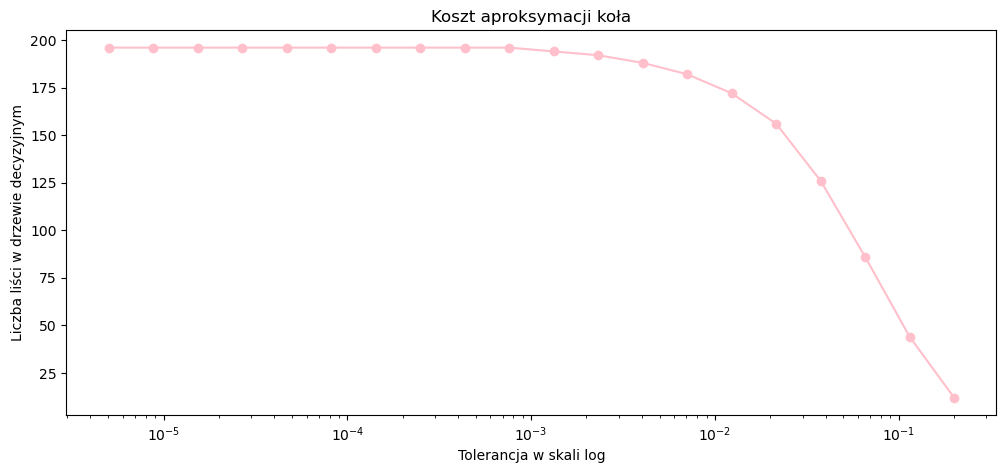

In [23]:
from sklearn.metrics import accuracy_score

# Podpunkt c
def count_splits_for_circle(X, y, radius, tolerance):
    """ Liczy ile podzialow potrzeba do aproksymacji okregu ."""
    X = X * radius
    for max_leaves in range(4, 500, 2):
        tree = DecisionTreeClassifier(max_leaf_nodes=max_leaves, random_state=42)
        tree.fit(X, y)
        y_pred = tree.predict(X)
        current_error = 1.0 - accuracy_score(y, y_pred)

        if current_error <= tolerance:
            return max_leaves
    return 500

tolerances = np.logspace(np.log10(0.2), np.log(0.005), 20)
results = []

for tol in tolerances:
    n_leaves = count_splits_for_circle(X_circles, y_circles, radius=10, tolerance=tol)
    results.append(n_leaves)

plt.figure(figsize=(12, 5))
plt.plot(tolerances, results, 'o-', color='pink')
plt.xscale('log')
plt.xlabel("Tolerancja w skali log")
plt.ylabel("Liczba liści w drzewie decyzyjnym")
plt.title("Koszt aproksymacji koła")
plt.show()

In [24]:
# podpunkt d
from sklearn.base import BaseEstimator, ClassifierMixin

class ObliqueNode:
    def __init__(self, depth, max_depth):
        self.depth = depth
        self.max_depth = max_depth
        self.is_leaf = False
        self.class_label = None
        self.weights = None 
        self.threshold = None
        self.left = None
        self.right = None

    def fit(self, X, y, n_tries=20):
        # Warunki stopu: czysty węzeł lub max głębokość
        if len(np.unique(y)) == 1 or self.depth >= self.max_depth or len(y) < 2:
            self.is_leaf = True
            self.class_label = np.bincount(y).argmax()
            return

        best_gini = float('inf')
        best_weights = None
        best_threshold = None
        best_splits = None

        # Szukamy najlepszej kombinacji a1*x1 + a2*x2 
        # Próbujemy 'n_tries' losowych wektorów
        for _ in range(n_tries):
            weights = np.random.randn(X.shape[1])
            # Rzutujemy dane na ten wektor: Z = a1*x1 + a2*x2
            projection = X @ weights
            
            # Używamy szybkiego "pieńka decyzyjnego" (stump) ze sklearn 
            # aby znaleźć optymalny próg t dla tej konkretnej projekcji
            # To znacznie przyspiesza implementację w porównaniu do ręcznego liczenia Gini
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(projection.reshape(-1, 1), y)
            
            # Jeśli stump nic nie podzielił (np. wszystkie w jednej klasie)
            if stump.tree_.node_count < 3:
                continue
                
            threshold = stump.tree_.threshold[0]
            
            # Obliczamy jakość tego podziału
            gini = stump.tree_.impurity[0] 
            
            # Bardziej precyzyjne kryterium: Gini ważony dzieci
            # Podział danych wg stumpa
            mask = projection <= threshold
            y_left, y_right = y[mask], y[~mask]
            
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            # Obliczenie Gini ważonego
            def get_gini(arr):
                if len(arr) == 0: return 0
                counts = np.bincount(arr)
                probs = counts / len(arr)
                return 1 - np.sum(probs**2)
            
            weighted_gini = (len(y_left)*get_gini(y_left) + len(y_right)*get_gini(y_right)) / len(y)

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_weights = weights
                best_threshold = threshold
                best_splits = (mask, ~mask)

        # Jeśli nie znaleziono dobrego podziału, robimy liść
        if best_weights is None:
            self.is_leaf = True
            self.class_label = np.bincount(y).argmax()
            return

        # Zapisujemy najlepsze parametry
        self.weights = best_weights
        self.threshold = best_threshold
        
        # Rekurencja
        self.left = ObliqueNode(self.depth + 1, self.max_depth)
        self.right = ObliqueNode(self.depth + 1, self.max_depth)
        
        mask_l, mask_r = best_splits
        self.left.fit(X[mask_l], y[mask_l], n_tries)
        self.right.fit(X[mask_r], y[mask_r], n_tries)

    def predict_one(self, x):
        if self.is_leaf:
            return self.class_label
        # Sprawdzamy warunek: a1*x1 + a2*x2 <= t
        val = np.dot(x, self.weights)
        if val <= self.threshold:
            return self.left.predict_one(x)
        else:
            return self.right.predict_one(x)

class SimpleObliqueTree(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5, n_tries=20, random_state=42):
        self.max_depth = max_depth
        self.n_tries = n_tries
        self.random_state = random_state
        self.root = None
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.root = ObliqueNode(0, self.max_depth)
        self.root.fit(X, y, n_tries=self.n_tries)
        return self
    
    def predict(self, X):
        return np.array([self.root.predict_one(x) for x in X])

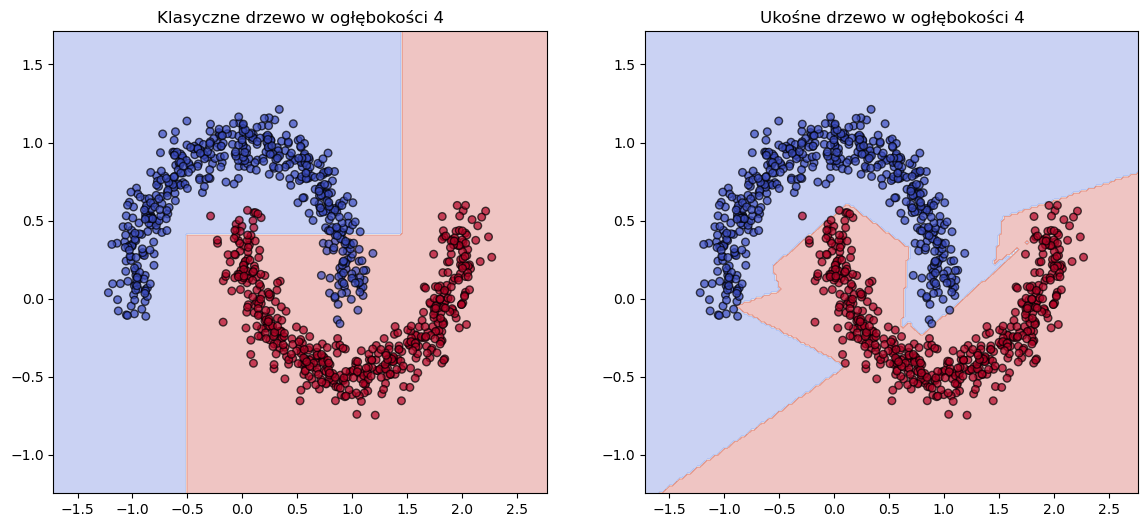

In [33]:
classic_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_oblique = SimpleObliqueTree(max_depth=4, n_tries=50, random_state=42)

classic_tree.fit(X_moons, y_moons)
tree_oblique.fit(X_moons, y_moons)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes = axes.flatten()
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z1 = classic_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
axes[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=30, edgecolors='k', cmap='coolwarm', alpha=0.7)
axes[0].set_title(f"Klasyczne drzewo w ogłębokości 4")

Z2 = tree_oblique.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
axes[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=30, edgecolors='k', cmap='coolwarm', alpha=0.7)
axes[1].set_title(f"Ukośne drzewo w ogłębokości 4")

plt.show()

W drzewie ukośnym szukamy hiperpłaszczyzny: $a_1 x_1 + \dots + a_n x_n < t$.
- Przestrzeń możliwych rozwiązań jest nieskończona (dowolny kąt obrotu).
- Znalezienie optymalnego podziału ukośnego jest problemem NP-trudnym.
- Wymaga to stosowania heurystyk (np. algorytmów ewolucyjnych, metod gradientowych lub losowania, jak w moim kodzie wyżej), co drastycznie wydłuża czas treningu i czyni go niedeterministycznym. Scikit-learn stawia na szybkość i stabilność.